In [ ]:

from matplotlib import pyplot as plt
from imutils.object_detection import non_max_suppression
import numpy as np
import cv2

In [ ]:
!sudo apt install tesseract-ocr
!apt install libtesseract-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [ ]:
! pip install Pillow
! pip install pytesseract
!sudo apt-get install tesseract-ocr-kan

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kan is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [ ]:
import pytesseract

In [ ]:
args = {"image":"/content/RTC,SY.png", "east":"/content/drive/My Drive/Models/frozen_east_text_detection.pb", "min_confidence":0.20, "width":1280, "height":1280}

In [ ]:
image = cv2.imread(args["image"])
orig = image.copy()
(H, W) = image.shape[:2]
H,W

(2550, 4200)

In [ ]:
(newW, newH) = (args["width"], args["height"])
rW = W / float(newW)
rH = H / float(newH)

In [ ]:
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [ ]:
layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]

In [ ]:
net = cv2.dnn.readNet(args["east"])

In [ ]:
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
                             (123.68, 116.78, 103.94), swapRB=True, crop=False)

In [ ]:
# Text detection
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
#geometry[0, 2, 1]

In [ ]:
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []

In [ ]:

for y in range(0, numRows):
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]
    for x in range(0, numCols):
        if scoresData[x] < args["min_confidence"]:
            continue
        (offsetX, offsetY) = (x * 4.0, y * 4.0)
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)
        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])

In [ ]:
boxes = non_max_suppression(np.array(rects), probs=confidences)

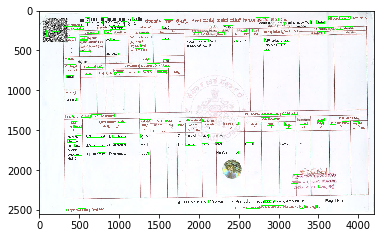

In [ ]:
for (startX, startY, endX, endY) in boxes:
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)
plt.imshow(orig)

In [ ]:
cv2.imwrite('output.png',orig)

True

In [ ]:
#Text Recognition 
results = []
for (startX, startY, endX, endY) in boxes:
  startX = int(startX * rW)
  startY = int(startY * rH)
  endX = int(endX * rW)
  endY = int(endY * rH)
  r = orig[startY:endY, startX:endX] 
  configuration = ("-l kan --oem 1 --psm 8")
  text = pytesseract.image_to_string(r, config=configuration)
  results.append(((startX, startY, endX, endY), text))


11೧1೧1೧

[ಎದಿ

2012.

ತಾಕಾ

ಕ್ಮ

ಗ್ನಿಗಿ೧!(!೧]

ಹಾರ್ಕ್ಯಾ3

_ಸ್ವ/ಎ೦ಗ೨1೧ಗ೧5/41114

ಗ್ನಿ೧೧೧೧]

ಾಮರಾದ್‌

[೧ .1/

ಶಾ ್‌ಾ್‌್ಹ್‌್ಮ್‌

೧777]

ಮಸಾಯಗಾರನ

ಕೆಸಗೂ

೧೦1

2012.

'ಸ.0ಕಂದಾಯ

2012

ಇ ಗುಗಿ1133

೧೩೦೮

ಸ೧7ಗುಗ13.

ಜಾ ಸತೆಗಳು ಗೀತಿ

೧೧ ೧೧

9ಗಿ12ತಗಿಹಿಗೀಗ ದ

೧೯೪ ಗ1

೧೧್ಭ೧ಿ

(೧೧

೧11

೧|೧೯೧ಗ

(೧.೫.೦)

1ಗಿಗಿಗಿ

ತಗಗೆಲ

ಗೆಕಾಡ್‌೧

'೨೧1೦-

11006

'$ೆಲೆಂಯು

9 ಗಿ ಇಲೆ!

ಮುತ

“ಗಾಟ್‌!

* ೧6?3ಲೆ

1೧೧ ಗಿ

ಸ ೧ಗಿಸಿಗಿತ]

ಗಗ ಬಾಗ!

: ಇಾಗರಾಜ್‌

1೦ಿದಿದ್ರ

ಇಾವಮುರಾದ

ನಂತ

*ಿಲೆಗಳ

ಸಂತ

ರಾವ್‌

*8ಲೆಗಳ ಓಟ

1೨ಟ೦ಗಿಗಿ೦.

ಮೂ)

"೧1೧೧

ರಾಟ್‌

ರ್ಗ ಟ್‌

ಇಹಿಗಿಗುರು

45.00

ಕಕ್ಕ ಗಿ ಗಟ] 1.

[೦ .

ಇ ಗಗ

ಗಾಖ್‌

ಗೇಣಿಂಯು

ಧ್ವ ಎನಗಣೂ)?

10./-]

ಸೇತುದಾರವು

2011

ಇತ್ಯಗೆ ದ್‌

ರ್ಯ

ಗಿ

2011

ಕೀಸಮುರು

ಇ. ೧ಾಗ]

ಮತು

ಕೆ ೧ಿಸಿಗ11

ಮುಂದ್‌

710

ರಣೆ

ಅಮಿತ

ಕಹು

ಗಳು:

ಇಾರದಂ

ಮುತ)

ಇತರೆಗೆ

ಹಜಾಲ

೨೧1೨ :

ಹೆಸರು

ನೀರಿಸ

ಗುಂ

ು೧1ಇ.

ಸಗಗ

ಇಗೂರಮಕ್ಸೆ

ಕ್ಸ್‌

ಜಗ ಗುಗಿಗ

ಹಸರು

1171]

೨.೦೦

ಮುರಾದ್‌

ಇತ

ನಿಯಮ

ಜಹವಾ?

ಇಣಔಿ

1...

೧೧1೨2

ಇಗುಾಗಿ1

ಹ್‌

೧೯

ಬೇಕಸಿಗೆ

ಹಂಟ್‌

೨.ನಾಗ

'ಮಿಶ

ಸೀರಾವರಿ

ಗುಣಗಳು

ಶಂಥ':

ನಾ]

ಸರರ್ಣ್ಚಾಗೆ

ಸಂತ

೧೧].

ಇಣಳಾಸ

3 ಗಿಲಿ. ೧ಿ(

ದೃ/02/

ಕರ್

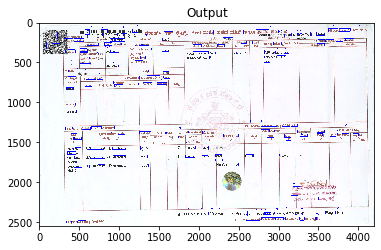

In [ ]:
orig_image = orig.copy()
for ((start_X, start_Y, end_X, end_Y), text) in results:
	print("{}\n".format(text))
	text = "".join([x if ord(x) < 128 else "" for x in text]).strip()
	cv2.rectangle(orig_image, (start_X, start_Y), (end_X, end_Y),
		(0, 0, 255), 2)
	cv2.putText(orig_image, text, (start_X, start_Y - 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0, 255), 2)
